# Gaussian Naive Bayes Classifier

A Gaussian distribution, also known as a normal distribution, is characterized by a bell-shaped curve with the mean (average) at the center and a certain standard deviation that determines the spread of the distribution. In a Gaussian distribution, most of the data points cluster around the mean, and the distribution is symmetric.

The Gaussian Naive Bayes algorithm assumes that the likelihood of observing the features given the class label follows a Gaussian distribution for each class. In other words, it assumes that the feature values within each class are distributed according to a Gaussian distribution.

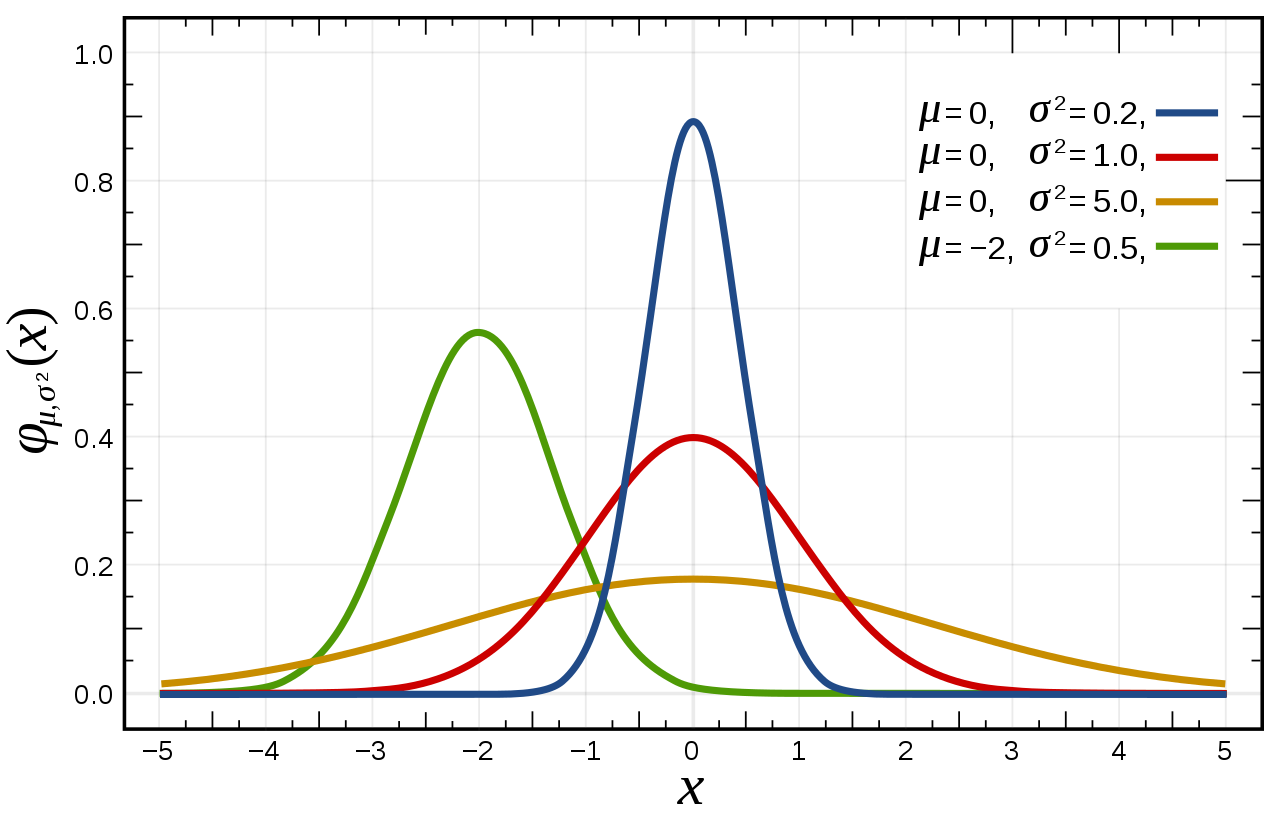

The likelihood of the features is assumed to be Gaussian, hence, conditional probability is given by:

$$ P(x_i|Y = y) = \frac{1}{\sqrt{2 \pi \sigma_y ^2}}e^{-\frac{(x_i - μ _ y)}{2  \sigma_y ^ 2}} $$

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [14]:
from ipywidgets import interact, FloatSlider

# Function to plot Gaussian distribution
def plot_gaussian(mean, std_dev):
    # Generate a range of x values
    x = np.linspace(-10, 10, 1000)

    # Compute the Gaussian function for each x
    y = (1 / (np.sqrt(2 * np.pi * std_dev**2))) * np.exp(- (x - mean)**2 / (2 * std_dev**2))

    # Use seaborn for a nicer looking plot
    sns.set(style="white", context="notebook")

    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title('Gaussian Distribution')
    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.show()

# Create interactive sliders for mean and standard deviation
interact(plot_gaussian, 
         mean=FloatSlider(min=-5, max=5, step=0.1, value=0), 
         std_dev=FloatSlider(min=0.1, max=5, step=0.1, value=1))


interactive(children=(FloatSlider(value=0.0, description='mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…

<function __main__.plot_gaussian(mean, std_dev)>

In [15]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


<br>
<br>
Let us check the ratio of positive to negative output in a pitorial representation.

<Axes: >

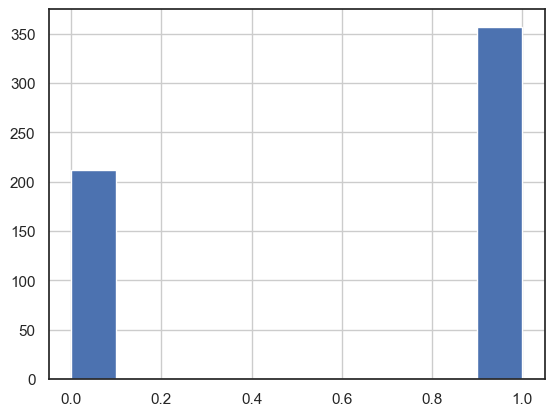

In [16]:
data['diagnosis'].hist()

As it can be seen, there are more positive examples than negative ones. So the dataset is a little biased towards the positive one. It can be solved by having better dataset , resampling or other advanced techniques.But they are not our concern for today.

Now we will check if the features are independent or not.

<Axes: >

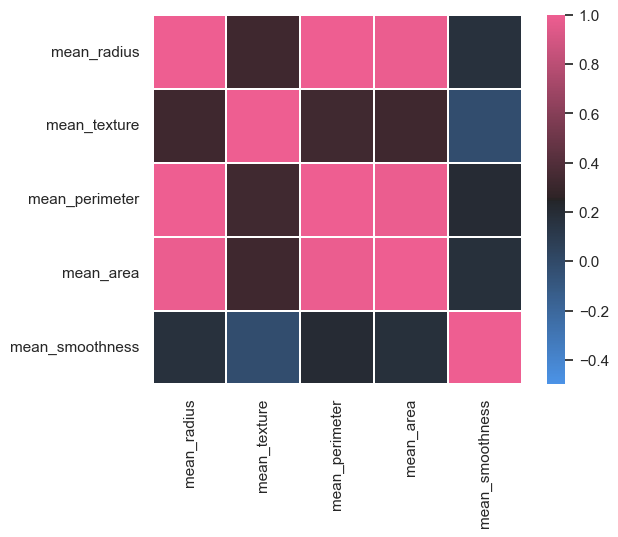

In [17]:
corr = data.iloc[:,:-1].corr(method = "pearson")
cmap = sns.diverging_palette(250,354,80,60,center="dark", as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

As it can be seen, mean_radius, mean_parameter and mean_area are highly dependent on one-another. So, we are going to take only one of them and exclude the rest.

In [18]:
data  = data[['mean_radius','mean_texture','mean_smoothness', 'diagnosis']]
data.head(30)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.990,10.38,0.11840,0
1,20.570,17.77,0.08474,0
2,19.690,21.25,0.10960,0
3,11.420,20.38,0.14250,0
4,20.290,14.34,0.10030,0
5,12.450,15.70,0.12780,0
6,18.250,19.98,0.09463,0
7,13.710,20.83,0.11890,0
8,13.000,21.82,0.12730,0
9,12.460,24.04,0.11860,0


<br>
<br>
Now let us see if the features follow the normal distribution or not.......

<Axes: xlabel='mean_smoothness', ylabel='Count'>

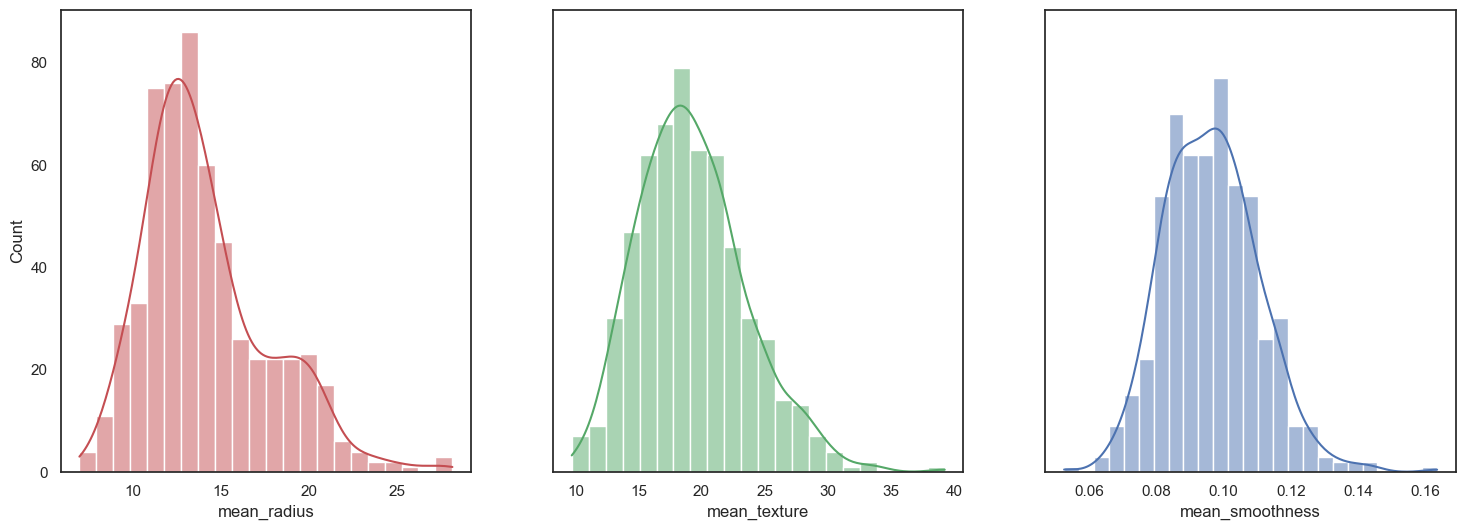

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_texture", kde=True , color='g')
sns.histplot(data, ax=axes[2], x="mean_smoothness", kde=True, color='b')

It is evident that all the features follow the gaussian distribution. So, guassian naive bayes is appliacble here.  

Now we will implement the code. As you will see, the main difference between the method used in the previous notebook and this one is in the implementation of the likelihood function. The gaussian naive bayes classification takes advantage of the bell curve to model the prediction model. 

In [21]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    
    for i in classes:
        prior.append( len(df[df[Y] == i]) / len(df[Y]))
        
    return prior

In [32]:
def gaussian_likelihood_pred(df, feature_name, feature_val, Y, y_label):
    df_class = df[df[Y] == y_label]  
    mean = df_class[feature_name].mean() 
    std_dev = df_class[feature_name].std()  
    
    # the bell curve's equation is used here
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-((feature_val - mean)**2) / (2 * (std_dev**2)))
    
    return p_x_given_y

In [33]:
### naive bayes gaussian

df = data

#values for the features
#mean_radius = 12.88 cm
#mean_texture = 20
#mean_smootheness = .30
X = [ 12.88, 20.00, .30]

#target
Y = "diagnosis"

#feature list
features = list(df.columns[:-1])

#all possible values of the target Y(target)
y_labels = sorted(list(df[Y].unique()))

# Prior P(Y=y)
prior_p_y = calculate_prior(df, Y)
   
output = y_labels[0]

max = -1

for j in range(len(y_labels)):
    p_xi_given_y = 1
    for i in range(len(features)):
        p_xi_given_y *= gaussian_likelihood_pred(data, features[i], X[i], Y, y_labels[j])
    
    p_y_given_x = p_xi_given_y * prior_p_y[j]
    if(p_y_given_x > max):
        max = p_y_given_x
        output = y_labels[j] #finding argmax

if(output):
    print("diagnosis  = yes ")
else:
    print("duagnosis = no ")

diagnosis  = yes 


The dataset is taken from this link : https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset